# <b>Cirebon Mask Classification Using Combined Feature and SVM Classifier</b>

## <b>Import Library</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## <b>Load Dataset</b>

In [2]:
trainData = pd.read_csv('data/dfCOMB_train.csv')
testData = pd.read_csv('data/dfCOMB_test.csv')
trainLabels = pd.read_csv('data/dfLTRAIN_train.csv')
testLabels = pd.read_csv('data/dfLTEST_test.csv')

In [3]:
combine = [trainData, testData, trainLabels, testLabels]
pd.concat(combine)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,506.93771,742.165345,530.442081,866.671751,0.175163,0.169320,0.177496,0.170005,0.900115,0.853773,...,2558.0,1.457192,94.966967,2331.0,1.493424,42.337827,2522.0,1.457192,94.966967,2331.0
1,452.071782,681.159091,506.568929,794.563131,0.161801,0.155731,0.162771,0.155705,0.891290,0.836331,...,2459.0,1.437986,90.326067,2156.0,1.487348,42.582395,2488.0,1.437986,90.326067,2156.0
2,582.026985,1399.285502,1102.061912,1376.575312,0.142958,0.136409,0.146532,0.136338,0.925417,0.820684,...,2421.0,1.448868,146.854179,1639.0,1.507132,64.738904,2884.0,1.460113,150.130284,1727.0
3,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
4,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
labels = trainLabels.iloc[:,0].unique()
print(labels)

['klana' 'pamindo' 'panji' 'rumyang' 'tumenggung']


## Exploratory Data Analysis

In [5]:
# Transform images to array
train = np.array(trainData)
test = np.array(testData)
train_label = np.array(trainLabels)
test_label = np.array(testLabels)

In [6]:
X_train = train
y_train = train_label
print(X_train)

[[5.06937710e+02 7.42165345e+02 5.30442081e+02 ... 1.45719228e+00
  9.49669670e+01 2.33100000e+03]
 [4.52071782e+02 6.81159091e+02 5.06568929e+02 ... 1.43798618e+00
  9.03260668e+01 2.15600000e+03]
 [5.82026985e+02 1.39928550e+03 1.10206191e+03 ... 1.46011291e+00
  1.50130284e+02 1.72700000e+03]
 ...
 [4.46644395e+02 6.37968278e+02 3.85697438e+02 ... 1.52637219e+00
  9.50370821e+01 1.64500000e+03]
 [4.49162941e+02 6.45556641e+02 3.87452975e+02 ... 1.52869730e+00
  9.48435252e+01 1.66800000e+03]
 [4.44997268e+02 6.43593455e+02 3.83911488e+02 ... 1.52466067e+00
  9.46614078e+01 1.64800000e+03]]


### Encode Label Data

In [7]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_train[:,0])
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

### Normalization Data

In [9]:
# Normalize the feature data
X = X_train.astype('float32') / 255.0
print(X.shape)

(1000, 28)


### Feature Scaling

In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.48636612 -0.46213073 -0.39995366 ...  0.7716364  -1.3010662
   2.2166388 ]
 [ 0.00774367 -0.6631873  -0.4906403  ...  0.5133294  -1.4669949
   1.7250417 ]
 [ 1.141407    1.7035221   1.771455   ...  0.8109163   0.6712162
   0.5199271 ]
 ...
 [-0.03960183 -0.8055302  -0.9497941  ...  1.7020465  -1.2985594
   0.2895786 ]
 [-0.01763167 -0.7805213  -0.9431255  ...  1.7333174  -1.3054796
   0.3541885 ]
 [-0.05397086 -0.7869913  -0.95657843 ...  1.679029   -1.311991
   0.29800618]]


## Splitting Data

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Training : ", X_train.shape, y_train.shape)
print("Data Testing : ", X_test.shape, y_test.shape)

Data Training :  (800, 28) (800,)
Data Testing :  (200, 28) (200,)


## Modelling

In [12]:
# Modelling with SVM One vs One
model_svm = SVC(kernel='linear', decision_function_shape='ovo', probability=True)
model_svm.fit(X_train, y_train)

SVC(decision_function_shape='ovo', kernel='linear', probability=True)

In [13]:
# Class model for data labels
model_svm.classes_

array([0, 1, 2, 3, 4])

In [14]:
# Predict the model
y_pred = model_svm.predict(X_test)
print(f'Prediksi model SVM yaitu... {y_pred}')

Prediksi model SVM yaitu... [2 3 3 3 2 3 3 2 4 0 4 0 3 4 4 4 1 4 3 1 2 0 1 2 1 1 0 4 4 4 1 0 3 2 1 0 3
 2 4 0 1 0 1 4 1 1 4 3 2 4 2 4 1 2 0 0 3 0 1 4 1 0 2 1 3 3 3 4 0 2 0 2 2 3
 1 1 3 0 2 1 3 0 1 0 1 2 4 3 3 1 1 2 2 1 3 2 3 0 0 4 3 1 4 1 3 3 2 4 0 4 2
 4 4 4 0 2 0 4 2 1 4 2 3 1 1 2 2 2 4 4 2 4 1 4 2 0 0 1 0 0 0 1 3 1 4 4 4 1
 4 1 3 0 4 2 4 2 1 3 0 4 2 3 3 3 4 3 1 3 1 1 1 2 0 4 2 1 1 1 4 3 2 3 1 2 4
 0 1 1 4 3 4 4 3 0 1 2 1 1 3 0]


In [15]:
# Perintah untuk mencetak hasil apakah data aktual telah sesuai atau tidak?
print("Aktual data yaitu :")
np.array(y_test)

Aktual data yaitu :


array([2, 3, 3, 3, 2, 3, 3, 2, 4, 0, 4, 0, 3, 4, 4, 4, 1, 4, 3, 1, 2, 0,
       1, 2, 1, 1, 0, 4, 4, 4, 1, 0, 3, 2, 1, 0, 3, 2, 4, 0, 1, 0, 1, 4,
       1, 1, 4, 3, 2, 4, 2, 4, 1, 2, 0, 0, 3, 0, 1, 4, 1, 0, 2, 1, 3, 3,
       3, 4, 0, 2, 0, 2, 2, 3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 0, 1, 2, 4, 3,
       3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 4, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4,
       2, 4, 4, 4, 0, 2, 0, 4, 2, 1, 4, 2, 3, 1, 1, 2, 2, 2, 4, 4, 2, 4,
       1, 4, 2, 0, 0, 1, 0, 0, 0, 1, 3, 1, 4, 4, 4, 1, 4, 1, 3, 0, 4, 2,
       4, 2, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 1, 3, 1, 1, 1, 2, 0, 4, 2, 1,
       1, 1, 4, 3, 2, 3, 1, 2, 4, 0, 1, 1, 4, 3, 4, 4, 3, 0, 1, 2, 1, 1,
       3, 0])

## Evaluation Model

### Classification Report

In [16]:
# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, y_pred)
svm_classification_report = classification_report(y_test, y_pred)

print(f"SVM One vs One Accuracy: {svm_accuracy}")
print(f"SVM One vs One Classification Report:\n{svm_classification_report}")

SVM One vs One Accuracy: 1.0
SVM One vs One Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        44

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Confusion Matrix

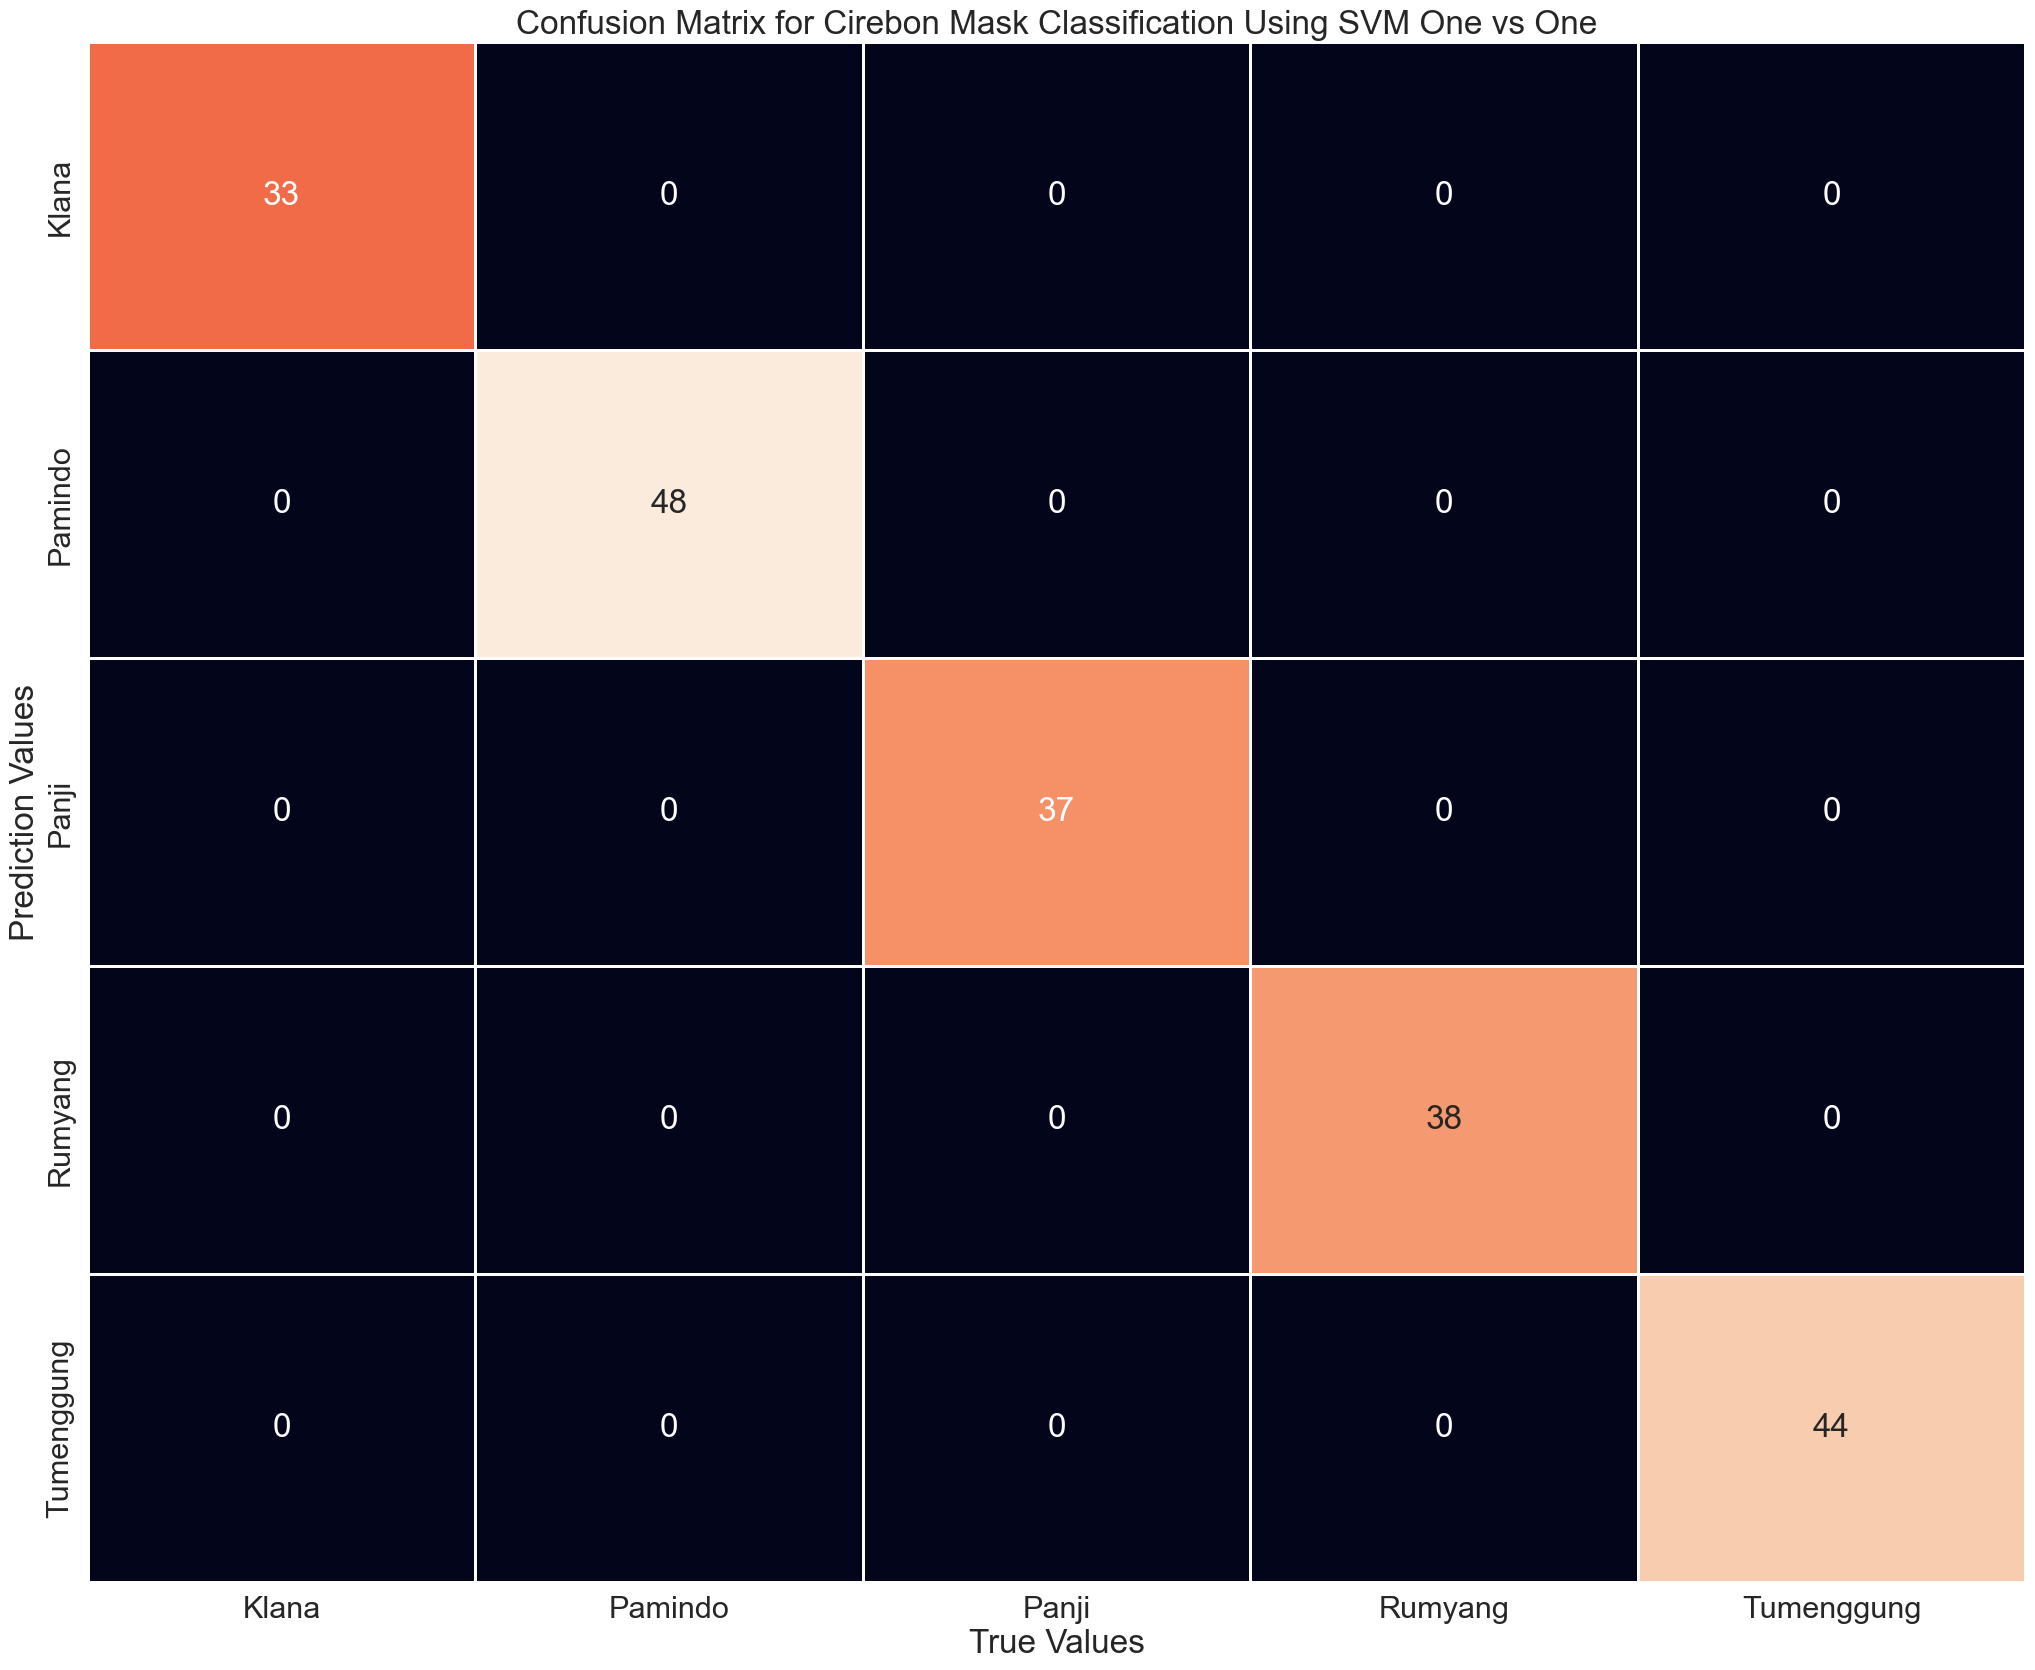

In [17]:
# Confusion Matrix
class_names = ['Klana',
               'Pamindo',
               'Panji',
               'Rumyang',
               'Tumenggung']

# Plotting a confusion matrix for checking the performance of our model
Y_pred = model_svm.predict(X_test)
cm = confusion_matrix(y_test, Y_pred, labels=np.unique(y_test), sample_weight=None)

df_cm = pd.DataFrame(cm, class_names, class_names)
sns.set(font_scale = 2)
plt.figure(figsize = (25, 20))
sns.heatmap(df_cm, annot = True, linewidths = 0.8, fmt = '0.4g', cbar = False)
plt.title("Confusion Matrix for Cirebon Mask Classification Using SVM One vs One")
plt.xlabel("True Values")
plt.ylabel("Prediction Values")
plt.show()

## <b>Hyperparamenter Tuning For SVM One vs All Classifier</b>

In [31]:
# Lakukan pemodelan dengan metode SVM secara hyperparameter tuning
param_grid = {'C':[0.1, 0.01, 0.001], 
              'gamma':[0.001, 0.1, 0.01], 
              'kernel':['linear', 'rbf', 'poly']}
# Support Vector Classifier dengan mode One Vs rest
svc = SVC(probability=True, decision_function_shape='ovr')
print("Pelatihan model dimulai, mohon tunggu sebentar sampai selesai!")

Pelatihan model dimulai, mohon tunggu sebentar sampai selesai!


In [32]:
# Hyperparameter Tuning Model dengan GridSearchCV
model_tuning = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
model_tuning.fit(X_train, y_train)
# Mencetak hasil parameter model mana yang paling baik setelah dilatih
print('Model yang dilatih dengan data fitur gambar...', model_tuning.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.988 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.519 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.550 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.750 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.738 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.744 total time=   0.3s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.212 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly

[CV 2/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.212 total time=   0.0s
[CV 3/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.206 total time=   0.0s
[CV 4/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.206 total time=   0.0s
[CV 5/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.206 total time=   0.0s
[CV 1/5] END .C=0.001, gamma=0.1, kernel=linear;, score=0.912 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/5] END .C=0.001, gamma=0.1, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END .C=0.001, gamma=0.1, kernel=linear;, score=0.931 total time=   0.0s
[CV 5/5] END .C=0.001, gamma=0.1, kernel=linear;, score=0.938 total time=   0.0s
[CV 1/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.212 total time=   0.1s
[CV 2/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.212 total time=   0.1s
[CV 3/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.206 total time=   0.1s
[CV 4/5] END ....C=0.001, ga

In [33]:
# Lakukan prediksi model pada data gambar yang dilatih
Y_pred = model_tuning.predict(X_test)
print("Prediksi model data yaitu :")
Y_pred

Prediksi model data yaitu :


array([2, 3, 3, 3, 2, 3, 3, 2, 4, 0, 4, 0, 3, 4, 4, 4, 1, 4, 3, 1, 2, 0,
       1, 2, 1, 1, 0, 4, 4, 4, 1, 0, 3, 2, 1, 0, 3, 2, 4, 0, 1, 0, 1, 4,
       1, 1, 4, 3, 2, 4, 2, 4, 1, 2, 0, 0, 3, 0, 1, 4, 1, 0, 2, 1, 3, 3,
       3, 4, 0, 2, 0, 2, 2, 3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 0, 1, 2, 4, 3,
       3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 4, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4,
       2, 4, 4, 4, 0, 2, 0, 4, 2, 1, 4, 2, 3, 1, 1, 2, 2, 2, 4, 4, 2, 4,
       1, 4, 2, 0, 0, 1, 0, 0, 0, 1, 3, 1, 4, 4, 4, 1, 4, 1, 3, 0, 4, 2,
       4, 2, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 1, 3, 1, 1, 1, 2, 0, 4, 2, 1,
       1, 1, 4, 3, 2, 3, 1, 2, 4, 0, 1, 1, 4, 3, 4, 4, 3, 0, 1, 2, 1, 1,
       3, 0])

In [34]:
# Perintah untuk mencetak hasil apakah data aktual telah sesuai atau tidak?
print("Aktual data yaitu :")
np.array(y_test)

Aktual data yaitu :


array([2, 3, 3, 3, 2, 3, 3, 2, 4, 0, 4, 0, 3, 4, 4, 4, 1, 4, 3, 1, 2, 0,
       1, 2, 1, 1, 0, 4, 4, 4, 1, 0, 3, 2, 1, 0, 3, 2, 4, 0, 1, 0, 1, 4,
       1, 1, 4, 3, 2, 4, 2, 4, 1, 2, 0, 0, 3, 0, 1, 4, 1, 0, 2, 1, 3, 3,
       3, 4, 0, 2, 0, 2, 2, 3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 0, 1, 2, 4, 3,
       3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 4, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4,
       2, 4, 4, 4, 0, 2, 0, 4, 2, 1, 4, 2, 3, 1, 1, 2, 2, 2, 4, 4, 2, 4,
       1, 4, 2, 0, 0, 1, 0, 0, 0, 1, 3, 1, 4, 4, 4, 1, 4, 1, 3, 0, 4, 2,
       4, 2, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 1, 3, 1, 1, 1, 2, 0, 4, 2, 1,
       1, 1, 4, 3, 2, 3, 1, 2, 4, 0, 1, 1, 4, 3, 4, 4, 3, 0, 1, 2, 1, 1,
       3, 0])

In [35]:
# Cetak hasil akurasi pada model data yang telah dilatih
print(f"Hasil akurasi model SVM One vs All yaitu {accuracy_score(Y_pred, y_test) * 100}% Akurat!")

Hasil akurasi model SVM One vs All yaitu 100.0% Akurat!


In [23]:
# Hasil evaluasi model
target_names = ['Klana',
                'Pamindo',
                'Panji',
                'Rumyang',
                'Tumenggung']

# Mencetak hasil evaluasi metriks keseluruhan pada klasifikasi
print(classification_report(Y_pred, y_test, target_names = target_names))

              precision    recall  f1-score   support

       Klana       1.00      1.00      1.00        33
     Pamindo       1.00      1.00      1.00        48
       Panji       1.00      1.00      1.00        37
     Rumyang       1.00      1.00      1.00        38
  Tumenggung       1.00      1.00      1.00        44

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



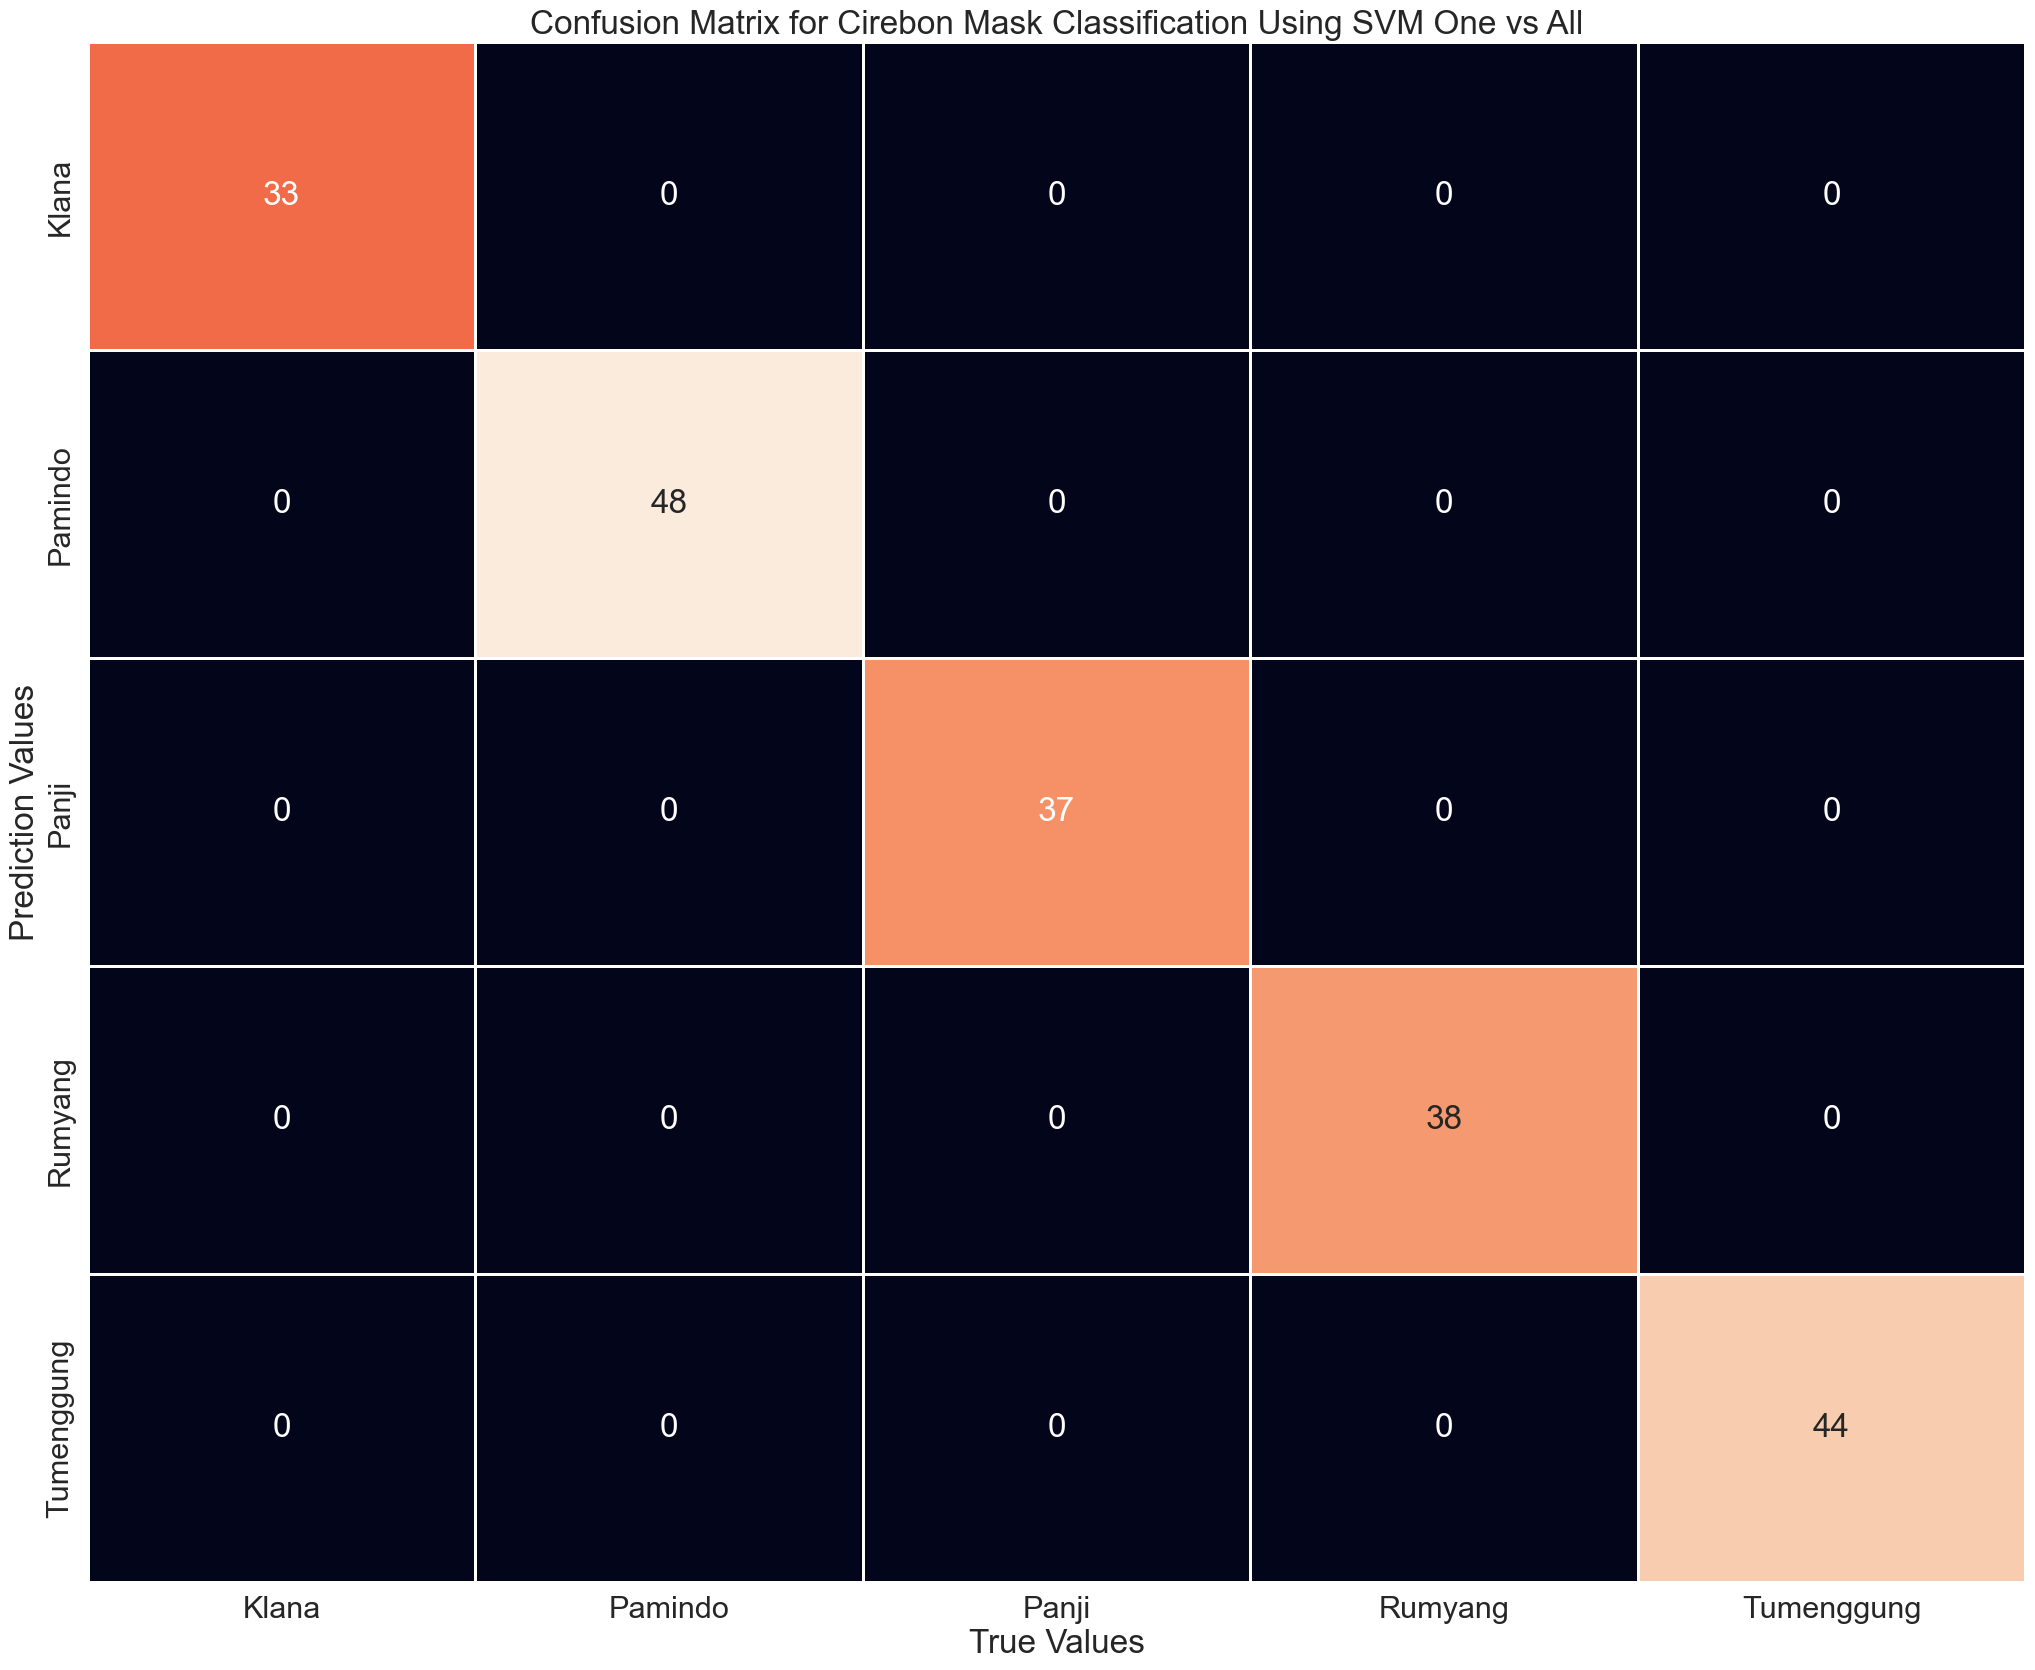

In [24]:
# Plotting a confusion matrix for checking the performance of our model
Y_pred = model_tuning.predict(X_test)
cm = confusion_matrix(y_test, Y_pred, labels=np.unique(y_test), sample_weight=None)

df_cm = pd.DataFrame(cm, target_names, target_names)
sns.set(font_scale = 2)
plt.figure(figsize = (25, 20))
sns.heatmap(df_cm, annot = True, linewidths = 0.8, fmt = '0.4g', cbar = False)
plt.title("Confusion Matrix for Cirebon Mask Classification Using SVM One vs All")
plt.xlabel("True Values")
plt.ylabel("Prediction Values")
plt.show()

## <b>Save The Model</b>

In [25]:
# Save the model
import pickle

filename = 'model/svm_mask.pkl'
pickle.dump(model_svm, open(filename, 'wb'))

In [26]:
# Simpan Model SVM Tuning
file_name = 'model/svm_tuning.sav'
pickle.dump(model_tuning, open(file_name, 'wb'))

## Load Model

In [27]:
# Load the Model
loaded_model = pickle.load(open(filename, 'rb'))
# Result the model
result = loaded_model.score(X_test, y_test)
print(f'Hasil terbaik model SVM adalah {result} persen!')

Hasil terbaik model SVM adalah 1.0 persen!


In [28]:
load_model = pickle.load(open(file_name, 'rb'))
result_model = load_model.score(X_test, y_test)
print("Hasil Akurasi Model SVM Tuning: ", result_model)

Hasil Akurasi Model SVM Tuning:  1.0


In [29]:
loaded_model.predict(X_test)

array([2, 3, 3, 3, 2, 3, 3, 2, 4, 0, 4, 0, 3, 4, 4, 4, 1, 4, 3, 1, 2, 0,
       1, 2, 1, 1, 0, 4, 4, 4, 1, 0, 3, 2, 1, 0, 3, 2, 4, 0, 1, 0, 1, 4,
       1, 1, 4, 3, 2, 4, 2, 4, 1, 2, 0, 0, 3, 0, 1, 4, 1, 0, 2, 1, 3, 3,
       3, 4, 0, 2, 0, 2, 2, 3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 0, 1, 2, 4, 3,
       3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 4, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4,
       2, 4, 4, 4, 0, 2, 0, 4, 2, 1, 4, 2, 3, 1, 1, 2, 2, 2, 4, 4, 2, 4,
       1, 4, 2, 0, 0, 1, 0, 0, 0, 1, 3, 1, 4, 4, 4, 1, 4, 1, 3, 0, 4, 2,
       4, 2, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 1, 3, 1, 1, 1, 2, 0, 4, 2, 1,
       1, 1, 4, 3, 2, 3, 1, 2, 4, 0, 1, 1, 4, 3, 4, 4, 3, 0, 1, 2, 1, 1,
       3, 0])

In [30]:
load_model.predict(X_test)

array([2, 3, 3, 3, 2, 3, 3, 2, 4, 0, 4, 0, 3, 4, 4, 4, 1, 4, 3, 1, 2, 0,
       1, 2, 1, 1, 0, 4, 4, 4, 1, 0, 3, 2, 1, 0, 3, 2, 4, 0, 1, 0, 1, 4,
       1, 1, 4, 3, 2, 4, 2, 4, 1, 2, 0, 0, 3, 0, 1, 4, 1, 0, 2, 1, 3, 3,
       3, 4, 0, 2, 0, 2, 2, 3, 1, 1, 3, 0, 2, 1, 3, 0, 1, 0, 1, 2, 4, 3,
       3, 1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 4, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4,
       2, 4, 4, 4, 0, 2, 0, 4, 2, 1, 4, 2, 3, 1, 1, 2, 2, 2, 4, 4, 2, 4,
       1, 4, 2, 0, 0, 1, 0, 0, 0, 1, 3, 1, 4, 4, 4, 1, 4, 1, 3, 0, 4, 2,
       4, 2, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 1, 3, 1, 1, 1, 2, 0, 4, 2, 1,
       1, 1, 4, 3, 2, 3, 1, 2, 4, 0, 1, 1, 4, 3, 4, 4, 3, 0, 1, 2, 1, 1,
       3, 0])